## **`Problem Statement - I`**
In the recent past, e-commerce companies have emerged and flourished in the industry. They offer the convenience to order from a wide variety of options from the comfort of one’s home. But how do they offer these “wide variety of options or products”? To be able to meet the demands of the customers, any e-commerce company would obviously need to store tons and tons of products in warehouses. Now, some of these warehoused products might be fast-moving products which sell very quickly and some others might be slow-moving. Each of the products being stored incurs a cost to the company in terms of space and maintenance. Since storing these products obviously add to the costs that the company incurs, it is absolutely necessary for the organisations to plan their inventory well.



Now, OList is one such e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing. In this assignment, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.


# **Step 1: Data Collection and Preparation**

Gather historical sales data from OList's e-commerce platform. This data should include information on products, customer transactions, sales amounts, and dates.
Clean and preprocess the data to ensure accuracy and consistency. Handle missing values, duplicates, and outliers if necessary.
Organize the data into a format suitable for analysis, such as a structured dataset or database.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Reading each table from the excel sheet**

# ORDERS TABLE

In [ ]:
#order table as OT
OT=pd.read_excel("/content/Retail_dataset.xlsx",sheet_name='orders')
OT.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [ ]:
OT.shape

(99441, 7)

In [ ]:
OT.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
#let's see what all order status are present
OT.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
#For the project we want order status as delivered
#referring OT_D as orders table with status as delivered
OT_D=OT[OT.order_status=='delivered']

OT_D.shape

(96478, 7)

Now we have data with order status as delivered

In [ ]:
OT_D.order_status.value_counts()

delivered    96478
Name: order_status, dtype: int64

In [ ]:
#checking for null values
OT_D.isnull().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [ ]:
# Create a boolean mask to identify rows with missing values
mask = OT_D['order_approved_at'].isna()

# Use the mask to filter the rows with missing values
rows_with_missing_values = OT_D[mask]

# Display the rows with missing values
print(rows_with_missing_values)

                               order_id                       customer_id  \
5323   e04abd8149ef81b95221e88f6ed9ab6a  8a9a08c7ca8900a200d83cf838a07e0b   
16567  8a9adc69528e1001fc68dd0aaebbb54a  91efb7fcabc17925099dced52435837f   
19031  7013bcfc1c97fe719a7b5e05e61c12db  e1f01a1bd6485e58ad3c769a5427d8a8   
22663  5cf925b116421afa85ee25e99b4c34fb  7e1a5ca61b572d76b64b6688b9f96473   
23156  12a95a3c06dbaec84bcfb0e2da5d228a  c8822fce1d0bfa7ddf0da24fff947172   
26800  c1d4211b3dae76144deccd6c74144a88  6ff8b0d7b35d5c945633b8d60165691b   
38290  d69e5d356402adc8cf17e08b5033acfb  2e0a2166aa23da2472c6a60c4af6f7a6   
39334  d77031d6a3c8a52f019764e68f211c69  c4c0011e639bdbcf26059ddc38bd3c18   
48401  7002a78c79c519ac54022d4f8a65e6e8  d49f3dae6bad25d05160fc17aca5942d   
61743  2eecb0d85f281280f79fa00f9cec1a95  5a4fa4919cbf2b049e72be460a380e5b   
63052  51eb2eebd5d76a24625b31c33dd41449  79af1bbf230a2630487975aa5d7d6220   
67697  88083e8f64d95b932164187484d90212  bc1896dc77f49e6dec880445a9b443a3   

In [ ]:
OT_D.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [ ]:
OT_D['diff']=OT_D['order_approved_at']-OT_D['order_purchase_timestamp']

In [ ]:
OT_D['diff'].min()

Timedelta('0 days 00:00:00')

In [ ]:
OT_D.dtypes

order_id                                  object
customer_id                               object
order_status                              object
order_purchase_timestamp          datetime64[ns]
order_approved_at                 datetime64[ns]
order_delivered_timestamp         datetime64[ns]
order_estimated_delivery_date     datetime64[ns]
diff                             timedelta64[ns]
dtype: object

In [ ]:
from datetime import datetime, timedelta, time

In [ ]:
# Fill missing values in 'order_approved_at' with the calculated default value
OT_D['order_approved_at'].fillna(OT_D['order_purchase_timestamp'] + timedelta(minutes=0, hours=0), inplace=True)

In [ ]:
OT_D.iloc[5323]

order_id                         a9fff775c01f5c2af9b79817fab57cd3
customer_id                      74ffea658fa22ea2788b68b244e2a9de
order_status                                            delivered
order_purchase_timestamp                      2018-06-29 06:53:08
order_approved_at                             2018-06-29 07:10:17
order_delivered_timestamp                     2018-07-04 16:18:57
order_estimated_delivery_date                 2018-07-19 00:00:00
diff                                              0 days 00:17:09
Name: 5482, dtype: object

In [ ]:
OT_D.order_delivered_timestamp.fillna(OT_D.order_estimated_delivery_date, inplace=True)

In [ ]:
OT_D.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                 0
order_delivered_timestamp         0
order_estimated_delivery_date     0
diff                             14
dtype: int64

In [ ]:
OT_D.drop(columns=['diff'], inplace=True)

In [ ]:
OT_D.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date'],
      dtype='object')

# ORDER ITEMS TABLE

In [ ]:
#order table as OT
OIT=pd.read_excel("/content/Retail_dataset.xlsx",sheet_name='order_items')
OIT.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [ ]:
OIT.shape

(112650, 6)

In [ ]:
OIT.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'shipping_charges'],
      dtype='object')

In [ ]:
OIT.isna().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

# CUSTOMERS TABLE

In [ ]:
#customer table as OT
cust=pd.read_excel("/content/Retail_dataset.xlsx",sheet_name='customers')
cust.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
cust.shape

(99441, 4)

In [ ]:
cust.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
total_unique_customer_ids = cust['customer_id'].nunique()

print(total_unique_customer_ids)

96096


Duplicate Customer ID

In [ ]:
shape = cust.shape

result = (shape[0] - total_unique_customer_ids, shape[1])

print(result)

(3345, 4)


In [ ]:
#drop duplicate customer id from customer table and keep the first occurence
cust.drop_duplicates(subset="customer_id", keep="first", inplace=True)

In [ ]:
cust.shape

(96096, 4)

# PAYMENT TABLE

In [ ]:
#payment table as OT
Pay=pd.read_excel("/content/Retail_dataset.xlsx",sheet_name='payments')
Pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
Pay.shape

(103886, 5)

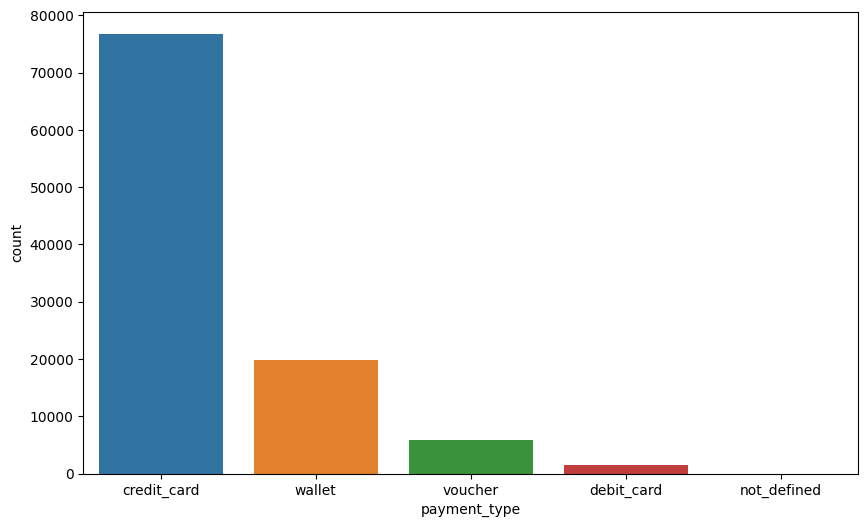

In [ ]:
#preffered payment method
plt.figure(figsize=(10,6))
sns.countplot(data=Pay, x=Pay['payment_type'])
plt.show()

1. payment method has some not defined values
2. credit card as it is the most used method

In [ ]:
Pay[Pay['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [ ]:
#As per the above table there was no payment made against the installment therefore payment type is not defined so we can drop this
n=Pay[Pay['payment_type']=='not_defined'].index
Pay.drop(n, axis=0, inplace=True)

In [ ]:
Pay[Pay['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [ ]:
Pay.shape

(103883, 5)

In [ ]:
Pay.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

# PRODUCTS TABLE

In [ ]:
#Products table as PT
PT=pd.read_excel("/content/Retail_dataset.xlsx",sheet_name='products')
PT.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [ ]:
PT.shape

(32951, 6)

In [ ]:
product_id_counts = PT['product_id'].value_counts()
total_counts = product_id_counts.sum()
print(total_counts)

32951


In [ ]:
PT['product_category_name'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

In [ ]:
PT.dtypes

product_id                object
product_category_name     object
product_weight_g         float64
product_length_cm        float64
product_height_cm        float64
product_width_cm         float64
dtype: object

In [ ]:
PT.isna().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [ ]:
category_counts = PT['product_category_name'].value_counts()

print(category_counts)

toys                                       24725
bed_bath_table                               789
sports_leisure                               721
furniture_decor                              687
health_beauty                                648
housewares                                   631
auto                                         489
computers_accessories                        425
watches_gifts                                336
telephony                                    286
baby                                         247
stationery                                   236
perfumery                                    225
fashion_bags_accessories                     212
cool_stuff                                   195
garden_tools                                 185
pet_shop                                     172
electronics                                  155
luggage_accessories                          103
office_furniture                              97
construction_tools_c

In [ ]:
#filling null values with the mode of product category
PT['product_category_name'].fillna('toys',inplace=True)

In [ ]:
PT.isna().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

In [ ]:
PT.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


Visulazing each parameter of the product

<Axes: xlabel='product_weight_g', ylabel='Density'>

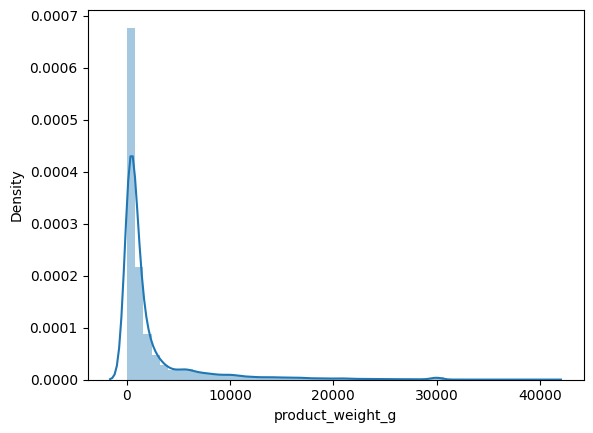

In [ ]:
sns.distplot(PT.product_weight_g)

<Axes: xlabel='product_length_cm', ylabel='Density'>

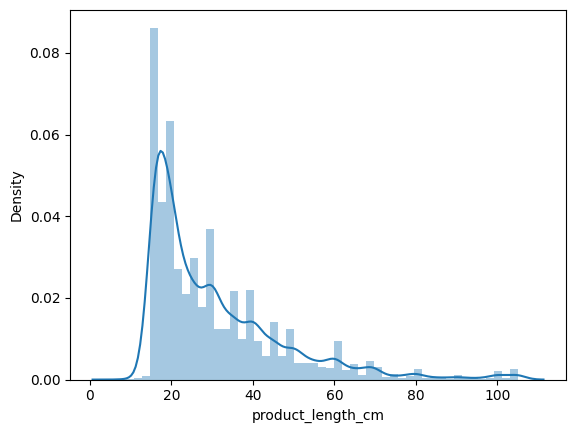

In [ ]:
sns.distplot(PT.product_length_cm)

<Axes: xlabel='product_height_cm', ylabel='Density'>

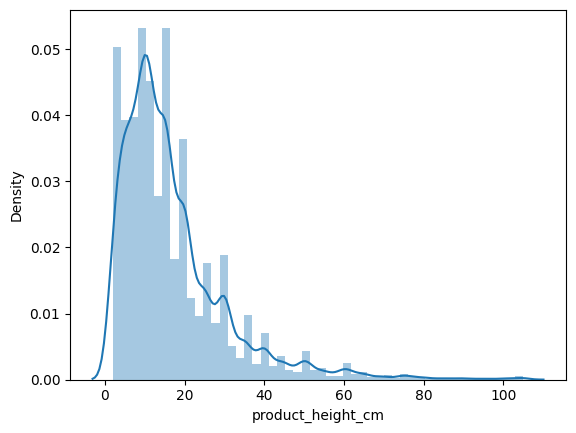

In [ ]:
sns.distplot(PT.product_height_cm)

<Axes: xlabel='product_width_cm', ylabel='Density'>

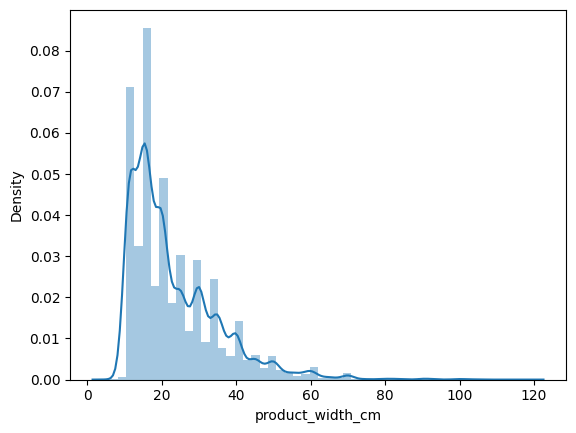

In [ ]:
sns.distplot(PT.product_width_cm)

In [ ]:
#filling na values with median
PT.product_weight_g.fillna(PT.product_weight_g.median(), inplace=True)
PT.product_length_cm.fillna(PT.product_length_cm.median(), inplace=True)
PT.product_height_cm.fillna(PT.product_height_cm.median(), inplace=True)
PT.product_width_cm.fillna(PT.product_width_cm.median(), inplace=True)

In [ ]:
PT.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

Now, the missing values in the datasets has been treated
we will now merge the different datasets according to the given model to use the final dataset for:

1. Removing and treating the Outliers.
2. Market Basket analysis using apriori alogorithm.


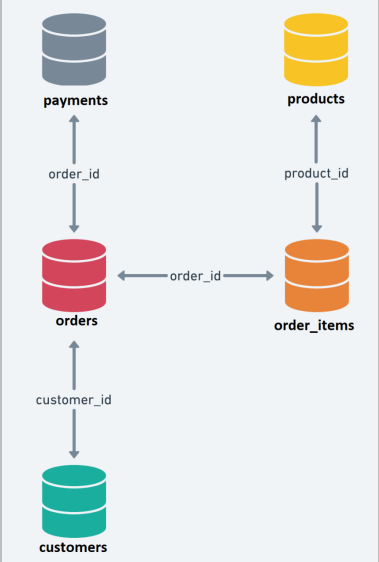

In [ ]:
#creating a new dataframe with only orders_delivered
# 1. Merging orders with order_items

OT_D=pd.merge(OT_D, OIT, how= 'inner', on='order_id')

In [ ]:
#merging with customers table

OT_D=pd.merge(OT_D, cust, how= 'inner', on='customer_id')

In [ ]:
#merging with Payment table
OT_D=pd.merge(OT_D, Pay, how= 'inner', on='order_id')

In [ ]:
#merging with Product table
OT_D=pd.merge(OT_D, PT, how= 'inner', on='product_id')

In [ ]:
OT_D.shape

(115035, 24)

In [ ]:
OT_D.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'price', 'shipping_charges', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm'],
      dtype='object')

In [ ]:
OT_D.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3149,sao paulo,SP,1,credit_card,1,18.12,housewares,500.0,19.0,8.0,13.0
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3149,sao paulo,SP,3,voucher,1,2.00,housewares,500.0,19.0,8.0,13.0
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,3149,sao paulo,SP,2,voucher,1,18.59,housewares,500.0,19.0,8.0,13.0
3,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,3366,sao paulo,SP,1,credit_card,3,37.77,housewares,500.0,19.0,8.0,13.0
4,0e7e841ddf8f8f2de2bad69267ecfbcf,ef0996a1a279c26e7ecbd737be23d235,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,2290,sao paulo,SP,1,credit_card,1,37.77,housewares,500.0,19.0,8.0,13.0


In [ ]:
#checking the data type of the columns
OT_D.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_timestamp        datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
price                                   float64
shipping_charges                        float64
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
payment_sequential                        int64
payment_type                             object
payment_installments                      int64
payment_value                           float64
product_category_name                    object
product_weight_g                        

In [ ]:
OT_D['price'].describe()

count    115035.000000
mean        120.083702
std         183.029335
min           0.850000
25%          39.900000
50%          74.900000
75%         133.000000
max        6735.000000
Name: price, dtype: float64

In [ ]:
# Set Pandas display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
grouped = OT_D.groupby('product_category_name')
category_stats = grouped['price'].describe()

# Print the category-wise price statistics
print(category_stats)


                                           count        mean         std  \
product_category_name                                                      
agro_industry_and_commerce                  78.0  205.770513  308.511977   
air_conditioning                            97.0  180.463196  144.694714   
art                                         16.0   98.242500   77.558355   
arts_and_craftmanship                        5.0   75.960000   91.821582   
audio                                      131.0   35.637252   35.817826   
auto                                      1076.0  134.758160  190.584642   
baby                                       788.0  128.809480  248.741046   
bed_bath_table                            2690.0   89.573524   81.070646   
books_general_interest                     105.0  103.021238  135.854210   
books_imported                              16.0  123.561250  169.826417   
books_technical                             94.0   63.167553   33.836295   
christmas_su

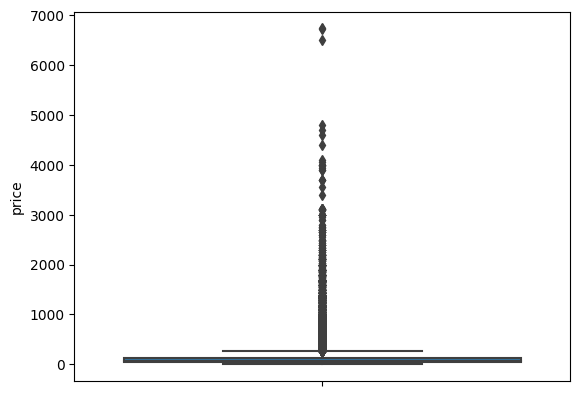

In [ ]:
#checking price distribution
sns.boxplot(data=OT_D,y=OT_D['price'])
plt.show()

The products price below 3000 is tightly packed , let us see what is the shape of data for prices above 3000

In [ ]:
expensive=OT_D[OT_D['price']>3000]

In [ ]:
expensive.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
36296,b239ca7cd485940b31882363b52e6674,ca27f3dac28fb1063faddd424c9d95fa,delivered,2018-07-29 08:39:48,2018-07-30 08:15:14,2018-07-31 23:03:28,2018-08-07,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,4059.00,104.51,34018,nova lima,MG,1,debit_card,1,4163.51,toys,8000.0,55.0,25.0,45.0
36297,a53e05ecd2ed1f46a2b8e1f5828be7c6,bc5e25094a7d51b6aee35236572e64f4,delivered,2018-01-26 14:30:21,2018-01-27 14:35:51,2018-02-02 13:53:10,2018-02-15,1,dd113cb02b2af9c8e5787e8f1f0722f6,821fb029fc6e495ca4f08a35d51e53a5,3690.00,136.80,35660,para de minas,MG,1,credit_card,10,3826.80,toys,8000.0,55.0,25.0,45.0
36469,3a4b013e014723cc38c9faa8ffdc6387,2c3b08cf3584d8c0a81d9618a73aa219,delivered,2018-04-09 11:32:37,2018-04-10 07:35:20,2018-04-13 02:06:43,2018-04-24,1,34f99d82cfc355d08d8db780d14aa002,a00824eb9093d40e589b940ec45c4eb0,3399.99,126.47,19023,presidente prudente,SP,1,credit_card,8,3526.46,toys,25950.0,39.0,95.0,42.0
40760,f5136e38d1a14a4dbd87dff67da82701,ff4159b92c40ebe40454e3e6a7c35ed6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-06-05 17:09:48,2017-06-28,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,6499.00,227.66,17506,marilia,SP,1,wallet,1,6726.66,toys,7400.0,47.0,25.0,25.0
41200,1d54db601b417ccdfd3b7071955e6cc7,bbeb907759ef5fc169099af3c88d535d,delivered,2018-04-27 05:57:39,2018-04-28 10:29:50,2018-05-03 23:52:04,2018-05-15,1,6e729bd456c54469a9af4c8774f1eab7,039e6ad9dae79614493083e241147386,3105.00,104.72,89113,gaspar,SC,1,credit_card,5,3209.72,garden_tools,6050.0,18.0,39.0,31.0


In [ ]:
expensive.shape

(28, 24)

As there are very less data for prices above 3000, we can check for which category we have these prices

In [ ]:
expensive.product_category_name.value_counts()

toys                              18
small_appliances                   2
health_beauty                      2
baby                               2
garden_tools                       1
construction_tools_safety          1
housewares                         1
industry_commerce_and_business     1
Name: product_category_name, dtype: int64

In [ ]:
# Filter the DataFrame for the 'toys' category
toys_category = OT_D[OT_D['product_category_name'] == 'toys']

# Calculate and print statistics for the 'Price' column within the 'toys' category
toys_price_stats = toys_category['price'].describe()
print(toys_price_stats)

count    86777.000000
mean       121.471022
std        184.660369
min          0.850000
25%         39.900000
50%         75.000000
75%        135.900000
max       6729.000000
Name: price, dtype: float64


In [ ]:
# Filter the DataFrame for the 'toys' category
toys_category = expensive[expensive['product_category_name'] == 'toys']

# Calculate and print statistics for the 'Price' column within the 'toys' category
toys_price_stats = toys_category['price'].describe()
print(toys_price_stats)


count      18.000000
mean     4223.540556
std       996.396123
min      3099.000000
25%      3692.497500
50%      3989.950000
75%      4542.467500
max      6729.000000
Name: price, dtype: float64


The price of toys are mostly below 3000, so taking 3000 as the benchmark we are replacing the greater price with 3000

In [ ]:
# Replace prices greater than 3000 with 3000
OT_D.loc[OT_D['price'] > 3000, 'price'] = 3000

In [ ]:
# Filter the DataFrame for the 'toys' category
toys_category = OT_D[OT_D['product_category_name'] == 'toys']

# Calculate and print statistics for the 'Price' column within the 'toys' category
toys_price_stats = toys_category['price'].describe()
print(toys_price_stats)

count    86777.000000
mean       121.217225
std        179.257401
min          0.850000
25%         39.900000
50%         75.000000
75%        135.900000
max       3000.000000
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='Density'>

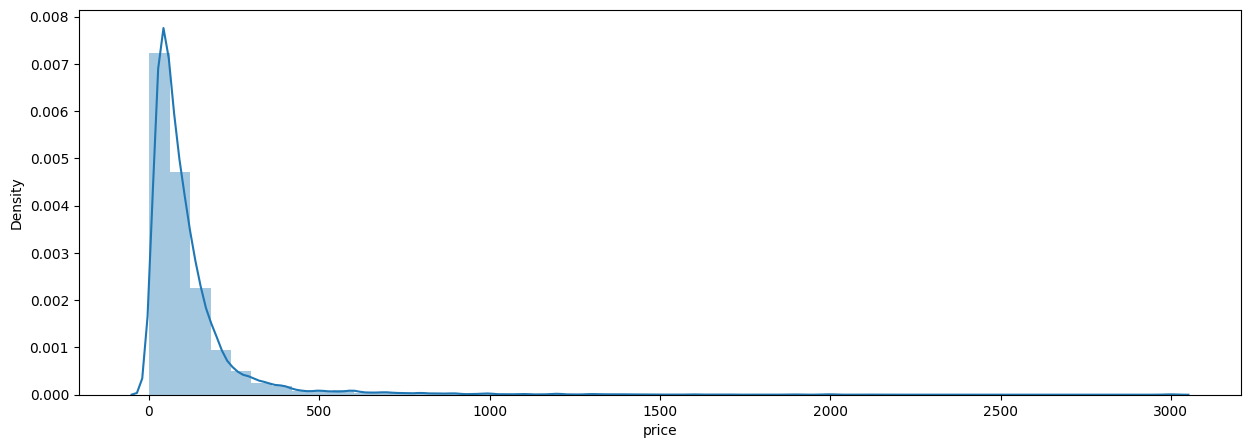

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(OT_D.price)

**Checking Shipping Charges**

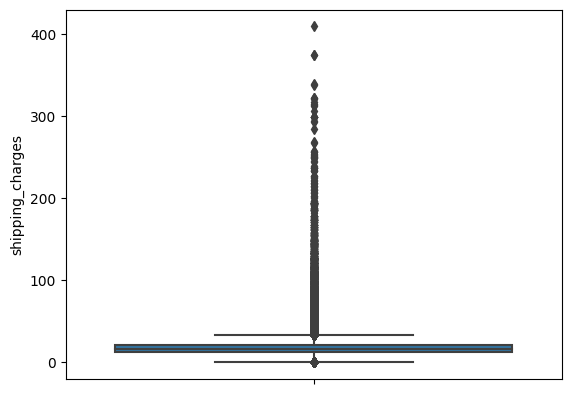

In [ ]:
#checking shipping charges distribution
sns.boxplot(data=OT_D,y=OT_D['shipping_charges'])
plt.show()

<Axes: xlabel='shipping_charges', ylabel='Density'>

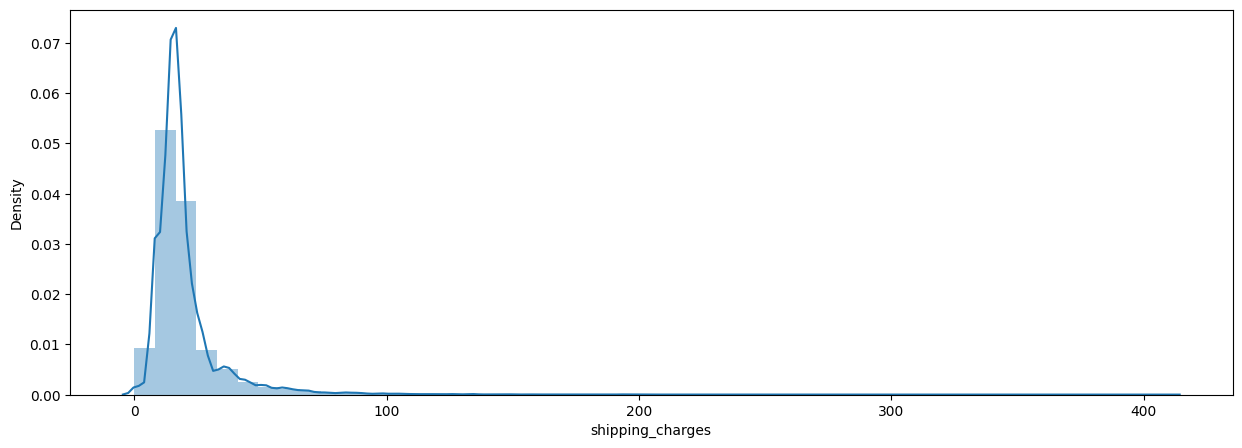

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(OT_D.shipping_charges)

In [ ]:
OT_D['shipping_charges'].describe()

count    115035.00000
mean         19.99557
std          15.74333
min           0.00000
25%          13.08000
50%          16.28000
75%          21.18000
max         409.68000
Name: shipping_charges, dtype: float64

In [ ]:
SC=OT_D[OT_D['shipping_charges']>100]
SC.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
457,ce6d150fb29ada17d2082f4847107665,3629a4b18f2eb69e03f153158e48d2cc,delivered,2018-01-25 11:17:02,2018-01-27 12:35:38,2018-02-21 17:38:51,2018-03-08,1,638bbb2a5e4f360b71f332ddfebfd672,c4af86330efa7a2620772227d2d670c9,1299.00,104.66,78580,alta floresta,MT,1,credit_card,10,1586.47,toys,20850.0,100.0,25.0,50.0
592,2ce3c61f3add382691fcad6a04f52680,1003a1d72627f1a71f255e239aaa4bfd,delivered,2018-05-10 15:24:26,2018-05-10 16:21:02,2018-06-04 17:32:40,2018-06-19,1,2b4609f8948be18874494203496bc318,cc419e0650a3c5ba77189a1882b7556a,79.99,185.73,44790,campo formoso,BA,1,wallet,1,1501.45,health_beauty,250.0,22.0,10.0,18.0
2124,a9f3eefeba2b707e39dfc81dea76cb3a,d44a92f37badb77d674e63c26b3ae2c0,delivered,2018-05-09 13:51:53,2018-05-10 11:36:37,2018-05-25 14:37:25,2018-06-05,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,119.00,105.07,65368,araguana,MA,1,credit_card,5,224.07,computers_accessories,6550.0,20.0,20.0,20.0
2209,637567b73e725cc4f07341561386e9b6,8c60d4ae12cbf30e7c0893640676dadb,delivered,2018-05-09 20:00:37,2018-05-09 20:15:16,2018-05-24 13:12:46,2018-06-06,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,119.00,105.07,57311,arapiraca,AL,1,credit_card,10,224.07,computers_accessories,6550.0,20.0,20.0,20.0
4081,73ab919f6023d8c8a68fb70d0b08a28b,20802dd4d187913c6d5b2b8f605bb817,delivered,2018-08-02 15:07:15,2018-08-02 15:24:03,2018-08-15 15:21:47,2018-08-28,1,a0b7d5a992ccda646f2d34e418fff5a0,95f83f51203c626648c875dd41874c7f,69.90,106.95,97800,sao luiz gonzaga,RS,1,credit_card,6,176.85,toys,12300.0,40.0,40.0,40.0


In [ ]:
SC.shape

(679, 24)

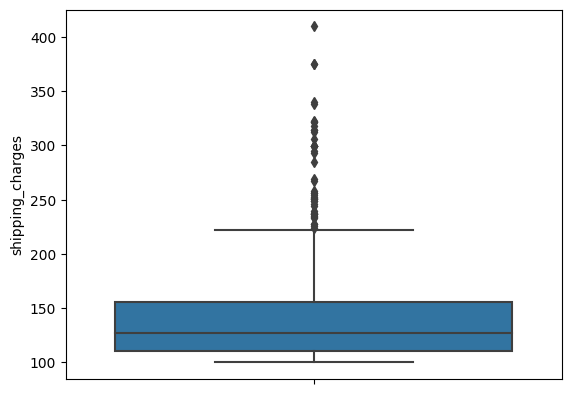

In [ ]:
sns.boxplot(data=SC,y=SC['shipping_charges'])
plt.show()

In [ ]:
SC['shipping_charges'].describe()

count    679.000000
mean     143.090074
std       47.837875
min      100.140000
25%      110.585000
50%      127.250000
75%      155.645000
max      409.680000
Name: shipping_charges, dtype: float64

In [ ]:
#imputing shipping charges more than 100 with median

# Calculate the median of the 'shipping' column
median_shipping = OT_D['shipping_charges'].median()

# Replace values greater than 100 with the median
OT_D['shipping_charges'] = OT_D['shipping_charges'].apply(lambda x: median_shipping if x > 100 else x)


In [ ]:
OT_D['shipping_charges'].describe()

count    115035.000000
mean         19.247067
std          12.018649
min           0.000000
25%          13.080000
50%          16.280000
75%          21.030000
max          99.970000
Name: shipping_charges, dtype: float64

# **Market Basket Analysis using Association Rules and Apriori**

In [ ]:
#mlxtend library, which provides tools for Market Basket Analysis
!pip install mlxtend


In [ ]:
#Load apriori and association modules from mlxtend.frequent_patterns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
#creating Delivered_orders dataframe with only the required columns for analysis

Delivered_orders = OT_D[['order_id','product_category_name', 'order_item_id']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Delivered_orders.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_category_name,order_item_id
0,e481f51cbdc54678b7cc49136f2d6af7,housewares,1
1,e481f51cbdc54678b7cc49136f2d6af7,housewares,1
2,e481f51cbdc54678b7cc49136f2d6af7,housewares,1
3,128e10d95713541c87cd1a2e48201934,housewares,1
4,0e7e841ddf8f8f2de2bad69267ecfbcf,housewares,1


In [ ]:
print(Delivered_orders.shape)

(115035, 3)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(Delivered_orders.duplicated().sum())

4841


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Identify and print rows with duplicate values across all columns
duplicate_rows =Delivered_orders[Delivered_orders.duplicated(keep=False)]

# Print the duplicate rows
print(duplicate_rows.head(20))

                             order_id product_category_name  order_item_id
0    e481f51cbdc54678b7cc49136f2d6af7            housewares              1
1    e481f51cbdc54678b7cc49136f2d6af7            housewares              1
2    e481f51cbdc54678b7cc49136f2d6af7            housewares              1
186  d367a93b215e8828942054fc3799c834                  toys              1
187  d367a93b215e8828942054fc3799c834                  toys              1
212  375e959b0c2a17fef2be1bdaa03fa1b6                  toys              1
213  375e959b0c2a17fef2be1bdaa03fa1b6                  toys              1
247  593dcbc6068648f021eb48b2d55ae96c                  toys              1
248  593dcbc6068648f021eb48b2d55ae96c                  toys              1
258  e69bfb5eb88e0ed6a785585b27e16dbf                  toys              1
259  e69bfb5eb88e0ed6a785585b27e16dbf                  toys              1
302  9ccf81055013ee5c95099ed3baf8ae4f                  toys              1
303  9ccf81055013ee5c9509

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Dropping the duplicates keeping the first occurence

Delivered_orders.drop_duplicates(keep='first', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(Delivered_orders.shape)

(110194, 3)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#prepare data for market basket analysis, where we can see which products were included in each order

MB_Combination = pd.pivot_table(data=Delivered_orders,index='order_id',columns='product_category_name',
                              values='order_item_id',fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
MB_Combination.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
MB_Combination.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(96477, 70)

In [ ]:
#For basket analysis encoding the data to 1s and 0s
def encdata(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
MB_encoded = MB_Combination.applymap(encdata)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#drop product categories (columns) whose total sale value is less than or equal to 5 from a DataFrame

for column in MB_encoded.columns:
    if (MB_encoded[column].sum(axis=0, skipna=True)<=5):
        MB_encoded.drop(column, inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
MB_encoded.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(96477, 61)

In [ ]:
#select only those 'order_ids' where at least two items were purchased.
#This filtering is done to find product combinations while excluding single-item orders, which may skew the analysis

MB_encoded= MB_encoded[(MB_encoded>0).sum(axis=1)>=2]
MB_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_category_name,agro_industry_and_commerce,air_conditioning,art,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,drinks,dvds_blu_ray,electronics,fashion_bags_accessories,fashion_male_clothing,fashion_shoes,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,garden_tools,health_beauty,home_appliances,home_appliances_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00337fe25a3780b3424d9ad7c5a4b35e,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
00946f674d880be1f188abc10ad7cf46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
00bcee890eba57a9767c7b5ca12d3a1b,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
01144cadcf64b6427f0a6580a3033220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
013a98b3a668bcef05b98898177f6923,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# **Generating frequent itemsets from a list of items**

**Step 1:** in generating association rules using the Apriori algorithm. It calculates frequent itemsets from a DataFrame (presumably containing transaction data encoded in the form of 1s and 0s for purchased and not purchased items) using the apriori function with a specified minimum support threshold.

*min_support=0.03* is the minimum support threshold specified as 3%. This means that an itemset (combination of items) must appear in at least 3% of the transactions to be considered a frequent itemset.

In [ ]:
frequent_items = apriori(MB_encoded, min_support=0.03, use_colnames=True)
frequent_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.031201,(auto)
1,0.230889,(bed_bath_table)
2,0.084243,(computers_accessories)
3,0.032761,(fashion_bags_accessories)
4,0.127145,(furniture_decor)
5,0.042122,(garden_tools)
6,0.066303,(health_beauty)
7,0.053822,(housewares)
8,0.055382,(sports_leisure)
9,0.971139,(toys)


In [ ]:
# Generate association rules with a minimum confidence threshold of 0.1
#Confidence - This measure defines the likeliness of occurrence of consequent on the cart given that the

rules_conf = association_rules(frequent_items, metric="confidence", min_threshold=0.1)
rules_conf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(auto),(toys),0.031201,0.971139,0.030421,0.975000,1.003976,0.000120,1.154446,0.004088
1,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714,0.421845
2,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580,0.015830
3,(computers_accessories),(toys),0.084243,0.971139,0.080343,0.953704,0.982047,-0.001469,0.623401,-0.019573
4,(fashion_bags_accessories),(toys),0.032761,0.971139,0.031981,0.976190,1.005202,0.000165,1.212168,0.005350
5,(toys),(furniture_decor),0.971139,0.127145,0.119345,0.122892,0.966546,-0.004131,0.995151,-0.545301
6,(furniture_decor),(toys),0.127145,0.971139,0.119345,0.938650,0.966546,-0.004131,0.470437,-0.038141
7,(garden_tools),(toys),0.042122,0.971139,0.035101,0.833333,0.858099,-0.005805,0.173167,-0.147222
8,(health_beauty),(toys),0.066303,0.971139,0.063183,0.952941,0.981262,-0.001207,0.613300,-0.020042
9,(housewares),(toys),0.053822,0.971139,0.049142,0.913043,0.940178,-0.003127,0.331903,-0.063010



The resulting **rules_conf** DataFrame contains association rules with their antecedent and consequent items, support, confidence, and other relevant metrics. These rules provide insights into product combinations and the likelihood of one product being purchased given the presence of another product in a transaction.

In [ ]:
#Lift - This measure defines the likeliness of occurrence of consequent on the cart given that the cart already
#keeping only those rules where the lift is greater than 1.
#This filter helps identify rules where the presence of the antecedent increases the likelihood of the consequent occurring beyond what would be expected by chance.

rules_lift=rules_conf[(rules_conf['lift'] > 1)]
rules_lift



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(auto),(toys),0.031201,0.971139,0.030421,0.975000,1.003976,0.000120,1.154446,0.004088
1,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714,0.421845
2,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580,0.015830
4,(fashion_bags_accessories),(toys),0.032761,0.971139,0.031981,0.976190,1.005202,0.000165,1.212168,0.005350
11,(watches_gifts),(toys),0.058502,0.971139,0.056942,0.973333,1.002260,0.000128,1.082293,0.002395


The resulting **rules_lift** DataFrame will contain association rules based on the lift metric, and these rules will provide insights into the likelihood of one product being purchased given the presence of another product while controlling for the popularity of the consequent. A lift value greater than 1 suggests a positive association, indicating that the presence of the antecedent increases the likelihood of the consequent occurring beyond what would be expected by chance.

**Exporting clean Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Exporting clean datasheets to Excel
with pd.ExcelWriter(r"/content/drive/MyDrive/DATA SCIENCE-20220919T153923Z-001/Marketing and Retail Analytics: Capstone Project/Clean_Retail_dataset.xlsx") as excel_sheets:
    OT_D.to_excel(excel_sheets, sheet_name="orders", index=False)
    OIT.to_excel(excel_sheets, sheet_name="order_items", index=False)
    PT.to_excel(excel_sheets, sheet_name="products", index=False)
    cust.to_excel(excel_sheets, sheet_name="customers", index=False)
    Pay.to_excel(excel_sheets, sheet_name="payments", index=False)

# Exporting additional market basket metrics data to Excel
with pd.ExcelWriter(r"/content/drive/MyDrive/DATA SCIENCE-20220919T153923Z-001/Marketing and Retail Analytics: Capstone Project/Apriori_Market_basket.xlsx") as excel_sheets:
    # Modify the columns before exporting
    frequent_items["itemsets"] = frequent_items["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")
    rules_conf["antecedents"] = rules_conf["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
    rules_conf["consequents"] = rules_conf["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
    rules_lift["antecedents"] = rules_lift["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")
    rules_lift["consequents"] = rules_lift["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

    # Export DataFrames to separate sheets
    frequent_items.to_excel(excel_sheets, sheet_name="support", index=False)
    rules_conf.to_excel(excel_sheets, sheet_name="confidence", index=False)
    rules_lift.to_excel(excel_sheets, sheet_name="lift", index=False)


print(f"DataFrame has been exported to {file_path}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Exception ignored in: <function ZipFile.__del__ at 0x7f35d1c55870>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1821, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


DataFrame has been exported to /content/drive/MyDrive/DATA SCIENCE-20220919T153923Z-001/Marketing and Retail Analytics: Capstone Project/Clean_Data.xlsx
